In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('Train_Data (1).csv')
test = pd.read_csv('Test_Data (2).csv')

In [ ]:
train.isna().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [ ]:
test.isna().sum()

,0
SEQN,2
RIAGENDR,2
PAQ605,1
BMXBMI,1
LBXGLU,1
DIQ010,1
LBXGLT,2
LBXIN,1


In [ ]:
train.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["age_group"]=le.fit_transform(train["age_group"])
le.classes_

array(['Adult', 'Senior'], dtype=object)

In [ ]:
train.shape

(1841, 9)

In [ ]:
train.corr()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
SEQN,1.000000,-0.006191,-0.022122,-0.074579,-0.043659,0.020326,-0.018462,-0.055422,0.020121
RIAGENDR,-0.006191,1.000000,0.154521,0.062806,-0.137801,-0.021819,0.018612,-0.020269,0.006800
PAQ605,-0.022122,0.154521,1.000000,-0.035145,-0.002557,0.014805,0.066956,0.023293,0.096164
BMXBMI,-0.074579,0.062806,-0.035145,1.000000,0.212865,0.056527,0.180522,0.546219,-0.007708
LBXGLU,-0.043659,-0.137801,-0.002557,0.212865,1.000000,-0.052175,0.666786,0.222494,0.126331
DIQ010,0.020326,-0.021819,0.014805,0.056527,-0.052175,1.000000,-0.010542,0.063540,0.033574
LBXGLT,-0.018462,0.018612,0.066956,0.180522,0.666786,-0.010542,1.000000,0.210259,0.247725
LBXIN,-0.055422,-0.020269,0.023293,0.546219,0.222494,0.063540,0.210259,1.000000,-0.064305
age_group,0.020121,0.006800,0.096164,-0.007708,0.126331,0.033574,0.247725,-0.064305,1.000000


<Axes: >

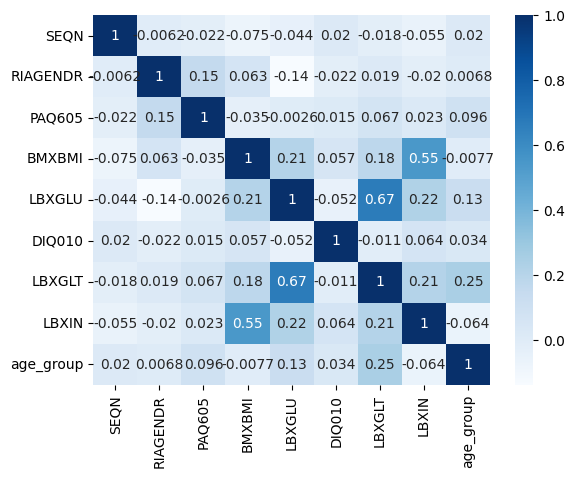

In [ ]:
sns.heatmap(train.corr(),annot=True,cmap="Blues")

In [ ]:
col = ["RIAGEYR"]
X = train.loc[:,col]
y = train["age_group"]
#,"LBXGLU"

KeyError: "None of [Index(['RIDAGEYR'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(y_train.value_counts())

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X = sc.transform(X)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
param = {
    "C":[0.1,1,10,50,100,500],
    "gamma":["scale","auto"],
    "kernel":["rbf","linear","poly","sigmoid"]
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param,refit=True,verbose=3,scoring="f1")
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
model = grid.best_estimator_

In [ ]:
model.predict(X_test)

In [ ]:
f1_score(y_test,y_pred)

In [ ]:
test.isna().sum()

In [ ]:
test_drop_na = test.dropna()

In [ ]:
test_x1 = test_drop_na.loc[:,col]

In [ ]:
test_x1 = sc.transform(test_x1)

In [ ]:
svm.predict(test_x1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

In [ ]:
lr.predict(test_x1)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
test_fill_na = pd.DataFrame(IterativeImputer().fit_transform(test))

In [ ]:
test_fill_na

In [ ]:
test_x2 = test_fill_na.loc[:,1]

In [ ]:
test_x2

In [ ]:
test_x2 = sc.transform(test_x2)

In [ ]:
result2 = pd.DataFrame(svm.predict(test_x2))

In [ ]:
result2.shape

In [ ]:
result2.columns = ["age_group"]

In [ ]:
# result2.to_csv("result5.csv")

In [ ]:
result3 = pd.DataFrame(model.predict(test_x2))

In [ ]:
result3.columns = ["age_group"]

In [ ]:
result3.shape

In [ ]:
# result3.to_csv("result6.csv")

In [ ]:
result3

In [ ]:
sns.countplot(x="age_group",data=result3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f1_score(y_test,y_pred))

In [ ]:
param_rf={
    "n_estimators" : [90,100,115,130],
    "criterion" : ["gini","entropy"],
    "max_depth" : [2,5,10,15],
    "min_samples_leaf" : [10,20,30,50,60,100,150,200,300,500],
    "max_features" : ["auto","log2"]
}
grid_rf = GridSearchCV(RandomForestClassifier(),param_rf,refit=True,verbose=3,scoring="f1")
grid_rf.fit(X_train,y_train)

In [ ]:
result4 = pd.DataFrame(rf.predict(test_x2),columns=["age_group"])

In [ ]:
# result4.to_csv("result7.csv")